In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Regression to the Mean

### Mohsin Javed, June 1, 2019

A common mistake while making predictions is that of ignoring regression to the mean. This igonrance is usually manifsted by an overestimation of the correlation between two otherwsie weakly correlated or even independent variables. Let us illustrate this by a simple example. 

### The Setup
We assume that there are $10$ stroes of a retail company ABC Inc., located in various parts of the UK. Let us also make the assumption that all stores are almost identical in terms of their size, capacity, customer interest and operate under similar ecnomic conditions such as location and average income of people living close by etc. In 2018, the total revenue of ABC was $£1$ million. 

Based on our assumptions, we expect each of the $10$ stores to contribute roughly $100$ thousand GBP to the revenue. However, when we look at the balance sheet of the firm, we find a different story. Some stores out-perforemed, while others underperformed. Of course, despite the fact that we had assumed that each of the stores is almost an identical economic entity, real life is more complicated and there is some amount of randomness in the total revenue contribution of each store. 

We threfore model the store revenue of the $i^{th}$ store $S_i$ as:

\begin{align}
S_i = \mu + \epsilon_i, \qquad i = 1, 2, \ldots, N,
\end{align}

where $\mu=£100000$ and $\{\epsilon_i\}$ are independent samples of a zero mean normal distribution of variance $\sigma^2$.

We write the folllowing code to generate a sample of store revenues:

In [29]:
def get_store_revenues_sample(total_revenue, N):
    # Get the raw sample
    mean_revenue = total_revenue/N
    S_sample = np.round(mean_revenue*(1 + .02 * np.random.randn(N)))
    # Adjust the smaple to sum to the total revenue:
    diff = (total_revenue - S_sample.sum())/N
    S_adj = S_sample + diff
    return S_adj

In [45]:
N = 10 # Number of stores
total_revenue = 1e6
S = get_store_revenues_sample(total_revenue, N)
df = pd.DataFrame({'Revenue 2017': S})
df

,Revenue 2017
0,98678.6
1,95686.6
2,101860.6
3,99882.6
4,101345.6
5,97463.6
6,99787.6
7,102365.6
8,101632.6
9,101296.6


Revenue 2017    1000000.0
dtype: float64

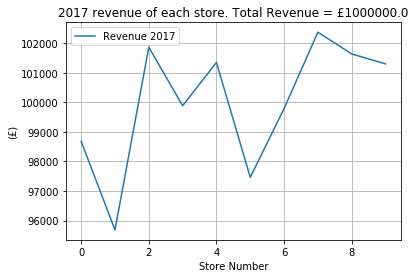

In [46]:
ax = df.plot(grid=True, title='2017 revenue of each store. Total Revenue = £{0}'.format(df['Revenue 2017'].sum()))
ax.set_xlabel("Store Number")
ax.set_ylabel("(£)")
df.sum()

### The Question
We are now told that in 2018, the revenue of ABC Inc. rose by $10$%. What is our best estimate of the revenue generated by each store in 2018?

### The Typical Answer

One simple way of answering this is by increasing the 2017 revenue of each store by $10$%. The _logic_ behind this estimate usually goes like this: if a store has produced $x$ amount of revenue last year, given that the firm revenue as a whole has risen by $10$%, we think that the revenue of this particular store should be around $1.1x$. 

Text(0, 0.5, '(£)')

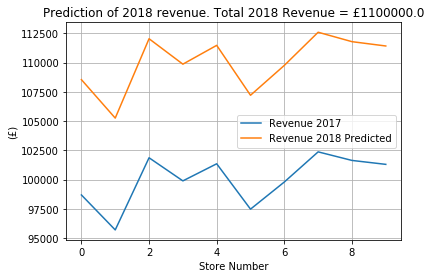

In [47]:
df['Revenue 2018 Predicted'] = 1.1 * df['Revenue 2017']
ax = df.plot(grid=True, title='Prediction of 2018 revenue. Total 2018 Revenue = £{0}'.format(df['Revenue 2018 Predicted'].sum()))
ax.set_xlabel("Store Number")
ax.set_ylabel("(£)")

Now take a step back and think: if there is any randomness involved in the store revenues, what are the chances of the above graph being produced? This is a classic example of gross over estimation of correlation between two independent samples. The two plots in the above figure are fully correlated, while accordig to our model they should have a correlation of zero. (The reality is probably somewhere in the middle, there is likely to be a mild correlation between the revenues of a given store on two successive years.) However, in the absence of any further information and keeping in view the model we assumed, it's best to go with a correlation of $0$. In this case, the best estimate is not computed by scaling the store revenues of last year by $1.1$, but by simply taking the mean of the 2018 revenues. 

In [48]:
df['Revenue 2018'] = get_store_revenues_sample(total_revenue * 1.1, N)

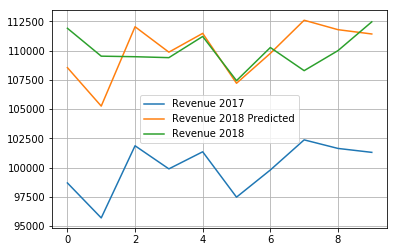

In [49]:
df.plot(grid=True)

In [50]:
df['Revenue 2018 Mean'] = total_revenue * 1.1 / N

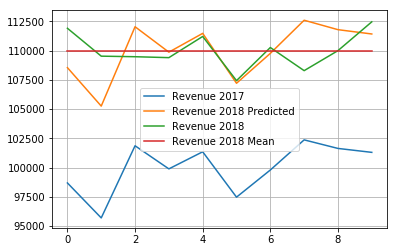

In [51]:
df.plot(grid=True)

In [52]:
df['Prediction Error'] = df['Revenue 2018'] - df['Revenue 2018 Predicted']
df['Deviation from Mean'] = df['Revenue 2018'] - df['Revenue 2018 Mean']

In [53]:
df

,Revenue 2017,Revenue 2018 Predicted,Revenue 2018,Revenue 2018 Mean,Prediction Error,Deviation from Mean
0,98678.6,108546.46,111914.7,110000.0,3368.24,1914.7
1,95686.6,105255.26,109528.7,110000.0,4273.44,-471.3
2,101860.6,112046.66,109480.7,110000.0,-2565.96,-519.3
3,99882.6,109870.86,109401.7,110000.0,-469.16,-598.3
4,101345.6,111480.16,111215.7,110000.0,-264.46,1215.7
5,97463.6,107209.96,107433.7,110000.0,223.74,-2566.3
6,99787.6,109766.36,110268.7,110000.0,502.34,268.7
7,102365.6,112602.16,108288.7,110000.0,-4313.46,-1711.3
8,101632.6,111795.86,110001.7,110000.0,-1794.16,1.7
9,101296.6,111426.26,112465.7,110000.0,1039.44,2465.7


In [69]:
e1 = np.linalg.norm(df['Prediction Error'])
e2 = np.linalg.norm(df['Deviation from Mean'])
print('Prediction error using last year: {0: .2f}'.format(e1))
print('Prediction error using mean:      {0: .2f}'.format(e2))
print('Regression to the mean is:        {0: .2f}% better'.format(100*(e1/e2-1)))

Prediction error using last year:  7725.89
Prediction error using mean:       4654.04
Regression to the mean is:         66.00% better
